In [4723]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn import preprocessing


In [4724]:
df = pd.read_csv('StudentSurveyData.csv')
df = df.drop(columns='Timestamp')  # Drop column (1) with the 'name'
df = df.drop(columns='Username')
df = df.drop(columns='Unnamed: 55')
df = df.drop(columns='Unnamed: 56')
df.fillna('NIL', inplace=True)

df.to_csv("CleanDataSet.csv")
ResearchData = pd.DataFrame(df)

ResearchData.head(15)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
0,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Fair,Moderately stressful,Sometimes,Yes,Somewhat concerned,NIL,Somtimes
1,Female,23-26,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Science,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Moderate,Good,Moderately stressful,Never,No,Not at all concerned,NIL,No
2,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Rarely,Yes,Somewhat concerned,Moderately concerned,Somtimes
3,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Sometimes,Sometimes because of limited hours,Somewhat concerned,Extremely concerned,Yes
4,Male,30-34,Graduate Degree,Domestic,Part time,Year 6,Other,Other,"I'm sorry, is this survey for Canadians only? ...",Yes,...,Course load was comparable to in-person,Everytime,Easy,Excellent,Not at all stressful,Never,NIL,Not at all concerned,Not at all concerned,No
5,Non-binary,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Arts,Other,Nottingham Trent University - Outside of Canada,Yes,...,No,Occasionally,Easy,Poor,Moderately stressful,Often,NIL,Extremely concerned,Extremely concerned,No
6,Female,18-22,Graduate Degree,Domestic,Full time,Year 1,Other,Other,Nottingham trent university,Yes,...,Yes,Occasionally,Difficult,Good,Moderately stressful,Sometimes,Yes,Extremely concerned,Moderately concerned,Somtimes
7,Female,18-22,Undergraduate Degree,International Student,Full time,Year 3,Bachelor of Science,University of Toronto,NIL,Yes,...,Course load was comparable to in-person,Occasionally,Easy,Good,Moderately stressful,Rarely,Yes,Somewhat concerned,Not at all concerned,Somtimes
8,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Commerce,McMaster University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Easy,Good,Similar to in-person learning,Sometimes,Yes,Somewhat concerned,Not at all concerned,Yes
9,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 2,Other,University of Waterloo,Bachelor of mathematics,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Good,Moderately stressful,Often,No,Extremely concerned,Extremely concerned,Somtimes


In [4725]:
ResearchData['What is your gender?'].value_counts()


Male                   25
Female                 18
Non-binary              5
Transgender             1
I prefer not to say     1
Name: What is your gender?, dtype: int64

In [4726]:
ResearchData['Are you a domestic or international student?'].value_counts()


Domestic                 41
International Student     7
Other                     2
Name: Are you a domestic or international student?, dtype: int64

In [4727]:
ResearchData['What program are you currently enrolled in?'].value_counts()


Bachelor of Engineering    23
Bachelor of Science        10
Other                       8
Bachelor of Arts            7
Bachelor of Commerce        2
Name: What program are you currently enrolled in?, dtype: int64

In [4728]:
ResearchData['How did you access your course material during the pandemic?'].value_counts()


Canvas        33
Blackboard     6
Other          5
Moodle         4
D2L            1
NIL            1
Name: How did you access your course material during the pandemic?, dtype: int64

In [4729]:
ResearchData['What online communication services did you use during the pandemic?'].value_counts()


Google Meet       32
Zoom               9
Microsoft Team     6
Other              2
NIL                1
Name: What online communication services did you use during the pandemic?, dtype: int64

In [4730]:
Gender = pd.DataFrame(
    ResearchData['What is your gender?'].value_counts()).reset_index()
Gender['Percentage'] = Gender['What is your gender?'] / \
    df['What is your gender?'].value_counts().sum()
Gender.rename(columns={'index': 'Gender',
              'What is your gender?': 'Total'}, inplace=True)

Gender


,Gender,Total,Percentage
0,Male,25,0.50
1,Female,18,0.36
2,Non-binary,5,0.10
3,Transgender,1,0.02
4,I prefer not to say,1,0.02


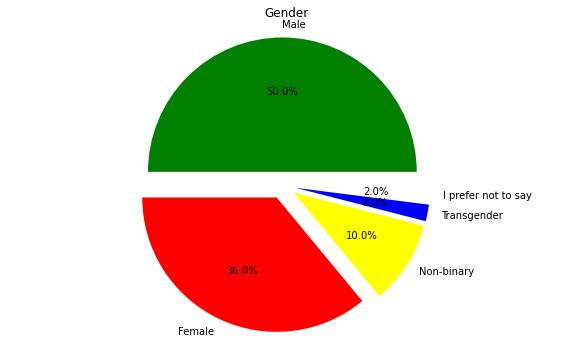

In [4731]:
# Customize Color
colors = ['Green', 'Red', 'Yellow', 'Blue', 'White']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# Create a pie chart
plt.pie(Gender['Total'], explode=explode, labels=Gender['Gender'],
        colors=colors, autopct='%1.1f%%', shadow=False, startangle=0)

# Add title
plt.title('Gender')
plt.axis('equal')

# Display Pie Chart
plt.rcParams["figure.figsize"] = (10, 6)
plt.show()


In [4732]:
# Converting Data to numerical value

ResearchDataCopy = ResearchData.copy()

le = preprocessing.LabelEncoder()

ResearchDataCopy = ResearchDataCopy.apply(le.fit_transform)
ResearchDataCopy.head(10)


,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
0,2,2,1,0,0,3,2,2,6,1,...,3,3,0,1,1,5,3,3,2,2
1,0,1,1,0,0,3,3,2,6,1,...,0,0,2,2,1,2,1,2,2,1
2,2,2,1,0,0,3,2,2,6,1,...,3,3,0,4,0,4,3,3,1,2
3,2,0,1,0,0,3,2,2,6,1,...,3,3,0,4,0,5,2,3,0,3
4,2,3,0,0,1,5,4,3,3,1,...,0,0,1,0,3,2,0,2,3,1
5,3,0,1,0,0,2,0,3,7,1,...,2,3,1,4,1,3,0,0,0,1
6,0,0,0,0,0,0,4,3,8,1,...,3,3,0,2,1,5,3,0,1,2
7,0,0,1,1,0,2,3,5,6,1,...,0,3,1,2,1,4,3,3,3,2
8,0,0,1,0,0,2,1,1,6,1,...,0,0,1,2,4,5,3,3,3,3
9,0,0,1,0,0,1,4,6,1,1,...,0,3,0,2,1,3,1,0,0,2


Analysis 1 - Was online learning more stressful than in-person learning which led to anxiety or depression? (Comparison between university/faculties)?

In [4733]:
filtered_1 = df[(df['Did you suffer from anxiety or depression during the pandemic?'] == 'Sometimes') | (df['Did you suffer from anxiety or depression during the pandemic?'] == 'Often') | (df['Did you suffer from anxiety or depression during the pandemic?'] == 'Always')]
filtered_1.shape

(38, 53)

In [4740]:
Analysis1 = pd.DataFrame(filtered_1, columns=['Did you suffer from anxiety or depression during the pandemic?', 'Was online learning more stressful than in-person learning?'])
Analysis1.head(10)

,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
0,Sometimes,Moderately stressful
3,Sometimes,Extremely stressful
5,Often,Moderately stressful
6,Sometimes,Moderately stressful
8,Sometimes,Similar to in-person learning
9,Often,Moderately stressful
10,Always,Similar to in-person learning
13,Often,Extremely stressful
14,Always,Extremely stressful
15,Sometimes,Extremely stressful


In [4741]:
Analysis1.replace({"Did you suffer from anxiety or depression during the pandemic?" : "Sometimes"}, "Often", inplace=True)
Analysis1.replace({"Did you suffer from anxiety or depression during the pandemic?" : "Always"}, "Often", inplace=True)

Analysis1.replace({"Was online learning more stressful than in-person learning?" : "Extremely stressful"}, "Moderately stressful", inplace=True)
Analysis1.head(10)

,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
0,Often,Moderately stressful
3,Often,Moderately stressful
5,Often,Moderately stressful
6,Often,Moderately stressful
8,Often,Similar to in-person learning
9,Often,Moderately stressful
10,Often,Similar to in-person learning
13,Often,Moderately stressful
14,Often,Moderately stressful
15,Often,Moderately stressful


In [4742]:
# Building the model with 5 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=12, init="Cao", n_init=1, verbose=1)
clusters = kmode.fit_predict(Analysis1)

Analysis1.insert(0, "Cluster", clusters, True)

cluster = Analysis1.groupby('Cluster')
cluster.count()

Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
Cluster,,
0,2,2
1,5,5
2,31,31


In [4743]:
Analysis1[Analysis1['Cluster'] == 0].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
34,0,Often,Not at all stressful
38,0,Often,Not at all stressful


In [4744]:
Analysis1[Analysis1['Cluster'] == 1].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
8,1,Often,Similar to in-person learning
10,1,Often,Similar to in-person learning
33,1,Often,Similar to in-person learning
46,1,Often,Similar to in-person learning
48,1,Often,Similar to in-person learning


In [4745]:
Analysis1[Analysis1['Cluster'] == 2].head(20)

,Cluster,Did you suffer from anxiety or depression during the pandemic?,Was online learning more stressful than in-person learning?
0,2,Often,Moderately stressful
3,2,Often,Moderately stressful
5,2,Often,Moderately stressful
6,2,Often,Moderately stressful
9,2,Often,Moderately stressful
13,2,Often,Moderately stressful
14,2,Often,Moderately stressful
15,2,Often,Moderately stressful
16,2,Often,Moderately stressful
17,2,Often,Moderately stressful


Analysis 2 - Was the grading scale too strict compared to in-person which impacted student's grades to be lower than in-person? 

In [ ]:
filtered_2 = df[(df['Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?'] == 'Too strict')]
filtered_2.shape

(17, 53)

In [ ]:
Analysis2 = pd.DataFrame(filtered_2, columns=['Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?', 'Did you feel your grade were lower compared to in-person learning?'])
Analysis2.head(10)

,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
0,Too strict,Grades were similar to in-person learning
2,Too strict,Yes
3,Too strict,No
10,Too strict,No
15,Too strict,No
18,Too strict,Yes
23,Too strict,Grades were similar to in-person learning
28,Too strict,Yes
32,Too strict,Yes
34,Too strict,No


In [ ]:
# Building the model with 5 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=4, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis2)

Analysis2.insert(0, "Cluster", clusters, True)
cluster = Analysis2.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
Cluster,,
0,1,1
1,4,4
2,9,9
3,3,3


In [ ]:
Analysis2[Analysis2['Cluster'] == 0].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
36,0,Too strict,NIL


In [ ]:
Analysis2[Analysis2['Cluster'] == 1].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
3,1,Too strict,No
10,1,Too strict,No
15,1,Too strict,No
34,1,Too strict,No


In [ ]:
Analysis2[Analysis2['Cluster'] == 2].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
2,2,Too strict,Yes
18,2,Too strict,Yes
28,2,Too strict,Yes
32,2,Too strict,Yes
35,2,Too strict,Yes
37,2,Too strict,Yes
40,2,Too strict,Yes
42,2,Too strict,Yes
44,2,Too strict,Yes


In [ ]:
Analysis2[Analysis2['Cluster'] == 3].head(20)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
0,3,Too strict,Grades were similar to in-person learning
23,3,Too strict,Grades were similar to in-person learning
39,3,Too strict,Grades were similar to in-person learning


In [ ]:
Analysis2Copy = Analysis2.copy()
le = preprocessing.LabelEncoder()

Analysis2Copy = Analysis2Copy.apply(le.fit_transform)
Analysis2Copy.head(10)

,Cluster,Was the grading scale for exams/quizzes/tests fair in online learning compared to in- person?,Did you feel your grade were lower compared to in-person learning?
0,3,0,0
2,2,0,3
3,1,0,2
10,1,0,2
15,1,0,2
18,2,0,3
23,3,0,0
28,2,0,3
32,2,0,3
34,1,0,2


Analysis 3 - Did the students require extra time for exams/tests/quizzes which impacted their grades during the pandemic?

In [ ]:
filtered_3 = df[((df['Did you require extra time for exams/tests/quizzes compared to in-person learning?'] == 'Yes')) | (df['Did you require extra time for exams/tests/quizzes compared to in-person learning?'] == 'Sometimes') ]
filtered_3.to_csv("temp.csv")
filtered_3.head(10)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
0,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Fair,Moderately stressful,Sometimes,Yes,Somewhat concerned,NIL,Somtimes
1,Female,23-26,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Science,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Moderate,Good,Moderately stressful,Never,No,Not at all concerned,NIL,No
2,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Rarely,Yes,Somewhat concerned,Moderately concerned,Somtimes
3,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Sometimes,Sometimes because of limited hours,Somewhat concerned,Extremely concerned,Yes
5,Non-binary,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Arts,Other,Nottingham Trent University - Outside of Canada,Yes,...,No,Occasionally,Easy,Poor,Moderately stressful,Often,NIL,Extremely concerned,Extremely concerned,No
6,Female,18-22,Graduate Degree,Domestic,Full time,Year 1,Other,Other,Nottingham trent university,Yes,...,Yes,Occasionally,Difficult,Good,Moderately stressful,Sometimes,Yes,Extremely concerned,Moderately concerned,Somtimes
9,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 2,Other,University of Waterloo,Bachelor of mathematics,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Good,Moderately stressful,Often,No,Extremely concerned,Extremely concerned,Somtimes
10,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Arts,Toronto Metropolitan University (Formerly know...,NIL,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Fair,Similar to in-person learning,Always,No,Somewhat concerned,Not at all concerned,No
13,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 1,Bachelor of Science,Other,King’s College London,Yes,...,Yes,Occasionally,Difficult,Fair,Extremely stressful,Often,Yes,Extremely concerned,Moderately concerned,No
15,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Never,Difficult,Good,Extremely stressful,Sometimes,NIL,Somewhat concerned,Moderately concerned,No


In [ ]:
Analysis3 = pd.DataFrame(filtered_3, columns=['Did you require extra time for exams/tests/quizzes compared to in-person learning?', 'Did you feel your grade were lower compared to in-person learning?'])
Analysis3.head(10)

,Did you require extra time for exams/tests/quizzes compared to in-person learning?,Did you feel your grade were lower compared to in-person learning?
0,Sometimes,Grades were similar to in-person learning
1,Yes,Yes
2,Sometimes,Yes
3,Yes,No
5,Yes,No
6,Yes,Yes
9,Sometimes,Yes
10,Yes,No
13,Sometimes,Grades were similar to in-person learning
15,Yes,No


In [ ]:
Analysis3.replace({"Did you require extra time for exams/tests/quizzes compared to in-person learning?" : "Sometimes"}, "Yes", inplace=True)
Analysis3.head(10)

,Did you require extra time for exams/tests/quizzes compared to in-person learning?,Did you feel your grade were lower compared to in-person learning?
0,Yes,Grades were similar to in-person learning
1,Yes,Yes
2,Yes,Yes
3,Yes,No
5,Yes,No
6,Yes,Yes
9,Yes,Yes
10,Yes,No
13,Yes,Grades were similar to in-person learning
15,Yes,No


In [ ]:
# Building the model with 5 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=4, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis3)

Analysis3.insert(0, "Cluster", clusters, True)
Analysis3

temp = Analysis3.groupby('Cluster')
temp.count()


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Did you require extra time for exams/tests/quizzes compared to in-person learning?,Did you feel your grade were lower compared to in-person learning?
Cluster,,
0,1,1
1,7,7
2,11,11
3,7,7


In [ ]:
Analysis3[Analysis3['Cluster'] == 0].head(20)


,Cluster,Did you require extra time for exams/tests/quizzes compared to in-person learning?,Did you feel your grade were lower compared to in-person learning?
36,0,Yes,NIL


In [ ]:
Analysis3[Analysis3['Cluster'] == 1].head(20)


,Cluster,Did you require extra time for exams/tests/quizzes compared to in-person learning?,Did you feel your grade were lower compared to in-person learning?
3,1,Yes,No
5,1,Yes,No
10,1,Yes,No
15,1,Yes,No
17,1,Yes,No
27,1,Yes,No
34,1,Yes,No


In [ ]:
Analysis3[Analysis3['Cluster'] == 2].head(20)

,Cluster,Did you require extra time for exams/tests/quizzes compared to in-person learning?,Did you feel your grade were lower compared to in-person learning?
1,2,Yes,Yes
2,2,Yes,Yes
6,2,Yes,Yes
9,2,Yes,Yes
24,2,Yes,Yes
28,2,Yes,Yes
32,2,Yes,Yes
35,2,Yes,Yes
40,2,Yes,Yes
42,2,Yes,Yes


In [ ]:
Analysis3[Analysis3['Cluster'] == 3].head(20)


,Cluster,Did you require extra time for exams/tests/quizzes compared to in-person learning?,Did you feel your grade were lower compared to in-person learning?
0,3,Yes,Grades were similar to in-person learning
13,3,Yes,Grades were similar to in-person learning
21,3,Yes,Grades were similar to in-person learning
23,3,Yes,Grades were similar to in-person learning
29,3,Yes,Grades were similar to in-person learning
39,3,Yes,Grades were similar to in-person learning
48,3,Yes,Grades were similar to in-person learning


Analysis 4 - Which university students prefer online? (Comparison between university/faculties)

In [ ]:
filtered_4 = df[((df['What do you think is the best learning process after the pandemic?'] == 'Online'))]
filtered_4.to_csv("temp.csv")
filtered_4.head(10)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
4,Male,30-34,Graduate Degree,Domestic,Part time,Year 6,Other,Other,"I'm sorry, is this survey for Canadians only? ...",Yes,...,Course load was comparable to in-person,Everytime,Easy,Excellent,Not at all stressful,Never,NIL,Not at all concerned,Not at all concerned,No
48,I prefer not to say,23-26,Undergraduate Degree,Domestic,Full time,Year 2,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,No,Everytime,Moderate,Fair,Similar to in-person learning,Sometimes,NIL,NIL,Moderately concerned,NIL
49,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Science,Other,Lesley University,Yes,...,Course load was comparable to in-person,Everytime,Easy,Fair,Not at all stressful,Rarely,No,Somewhat concerned,Not at all concerned,Yes


In [ ]:
Analysis4 = pd.DataFrame(filtered_4, columns=['What do you think is the best learning process after the pandemic?', 'What university are you attending?'])
Analysis4.head(10)

# Building the model with 5 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=3, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis4)

Analysis4.insert(0, "Cluster", clusters, True)
Analysis4

cluster = Analysis4.groupby('Cluster')
cluster.count()


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,What do you think is the best learning process after the pandemic?,What university are you attending?
Cluster,,
0,2,2
1,1,1


In [ ]:
Analysis4[Analysis4['Cluster'] == 0].head(20)


,Cluster,What do you think is the best learning process after the pandemic?,What university are you attending?
4,0,Online,Other
49,0,Online,Other


In [ ]:
Analysis4[Analysis4['Cluster'] == 1].head(20)

,Cluster,What do you think is the best learning process after the pandemic?,What university are you attending?
48,1,Online,Ontario Tech University


In [ ]:
Analysis4[Analysis4['Cluster'] == 2].head(20)

,Cluster,What do you think is the best learning process after the pandemic?,What university are you attending?


Analysis 5 - At Ontario Tech which faculty had the most impact on grades during the pandemic?

In [ ]:
filtered_5 = df[(df['What university are you attending?'] == 'Ontario Tech University') & (df['Did you feel your grade were lower compared to in-person learning?'] == 'Yes')]
filtered_5.head(10)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
1,Female,23-26,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Science,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Moderate,Good,Moderately stressful,Never,No,Not at all concerned,NIL,No
2,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Rarely,Yes,Somewhat concerned,Moderately concerned,Somtimes
18,Male,18-22,Undergraduate Degree,International Student,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Moderate,Excellent,Moderately stressful,Sometimes,No,Somewhat concerned,Extremely concerned,Somtimes
20,Transgender,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Arts,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Poor,Moderately stressful,Often,Sometimes because of limited hours,Extremely concerned,Moderately concerned,No
24,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 1,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,NIL,Difficult,Fair,Extremely stressful,Often,NIL,Extremely concerned,Moderately concerned,Yes
28,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Fair,Extremely stressful,Often,Sometimes because of limited hours,Somewhat concerned,Extremely concerned,Somtimes
32,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 2,Bachelor of Science,Ontario Tech University,NIL,Yes,...,No,Occasionally,Difficult,Good,Moderately stressful,Never,NIL,Somewhat concerned,Moderately concerned,No
35,Non-binary,23-26,Undergraduate Degree,Domestic,Full time,Year 2,Bachelor of Science,Ontario Tech University,NIL,Yes,...,Yes,Never,Difficult,Poor,Extremely stressful,Always,Sometimes because of limited hours,Extremely concerned,Extremely concerned,Yes
37,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Everytime,Difficult,Poor,Moderately stressful,NIL,No,Somewhat concerned,Moderately concerned,No
40,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Arts,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Fair,Extremely stressful,Always,Sometimes because of limited hours,Extremely concerned,Extremely concerned,Yes


In [ ]:
Analysis5 = pd.DataFrame(filtered_5, columns=['Did you feel your grade were lower compared to in-person learning?', 'What program are you currently enrolled in?', 'What university are you attending?'])
Analysis5.head(10)

,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?,What university are you attending?
1,Yes,Bachelor of Science,Ontario Tech University
2,Yes,Bachelor of Engineering,Ontario Tech University
18,Yes,Bachelor of Engineering,Ontario Tech University
20,Yes,Bachelor of Arts,Ontario Tech University
24,Yes,Bachelor of Engineering,Ontario Tech University
28,Yes,Bachelor of Engineering,Ontario Tech University
32,Yes,Bachelor of Science,Ontario Tech University
35,Yes,Bachelor of Science,Ontario Tech University
37,Yes,Bachelor of Engineering,Ontario Tech University
40,Yes,Bachelor of Arts,Ontario Tech University


In [ ]:
# Building the model with 5 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=5, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis5)

Analysis5.insert(0, "Cluster", clusters, True)
Analysis5

cluster = Analysis5.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?,What university are you attending?
Cluster,,,
0,3,3,3
1,2,2,2
2,7,7,7


In [ ]:
Analysis5[Analysis5['Cluster'] == 0].head(20)


,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?,What university are you attending?
1,0,Yes,Bachelor of Science,Ontario Tech University
32,0,Yes,Bachelor of Science,Ontario Tech University
35,0,Yes,Bachelor of Science,Ontario Tech University


In [ ]:
Analysis5[Analysis5['Cluster'] == 1].head(20)

,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?,What university are you attending?
20,1,Yes,Bachelor of Arts,Ontario Tech University
40,1,Yes,Bachelor of Arts,Ontario Tech University


In [ ]:
Analysis5[Analysis5['Cluster'] == 2].head(20)

,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?,What university are you attending?
2,2,Yes,Bachelor of Engineering,Ontario Tech University
18,2,Yes,Bachelor of Engineering,Ontario Tech University
24,2,Yes,Bachelor of Engineering,Ontario Tech University
28,2,Yes,Bachelor of Engineering,Ontario Tech University
37,2,Yes,Bachelor of Engineering,Ontario Tech University
42,2,Yes,Bachelor of Engineering,Ontario Tech University
44,2,Yes,Bachelor of Engineering,Ontario Tech University


In [ ]:
Analysis5[Analysis5['Cluster'] == 3].head(20)

,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?,What university are you attending?


In [ ]:
Analysis5[Analysis5['Cluster'] == 4].head(20)

,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?,What university are you attending?


Analysis 6 - Which university faculties had the most impact on grades?

In [ ]:
filtered_6 = df[(df['Did you feel your grade were lower compared to in-person learning?'] == 'Yes')]
filtered_6.head(20)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
1,Female,23-26,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Science,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Moderate,Good,Moderately stressful,Never,No,Not at all concerned,NIL,No
2,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Rarely,Yes,Somewhat concerned,Moderately concerned,Somtimes
6,Female,18-22,Graduate Degree,Domestic,Full time,Year 1,Other,Other,Nottingham trent university,Yes,...,Yes,Occasionally,Difficult,Good,Moderately stressful,Sometimes,Yes,Extremely concerned,Moderately concerned,Somtimes
9,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 2,Other,University of Waterloo,Bachelor of mathematics,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Good,Moderately stressful,Often,No,Extremely concerned,Extremely concerned,Somtimes
11,Female,23-26,Undergraduate Degree,Domestic,Full time,Year 5,Bachelor of Science,Other,Eastern Connecticut State University,Yes,...,Course load was comparable to in-person,Everytime,Difficult,Poor,Extremely stressful,Never,NIL,Somewhat concerned,Not at all concerned,Somtimes
18,Male,18-22,Undergraduate Degree,International Student,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Moderate,Excellent,Moderately stressful,Sometimes,No,Somewhat concerned,Extremely concerned,Somtimes
20,Transgender,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Arts,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Poor,Moderately stressful,Often,Sometimes because of limited hours,Extremely concerned,Moderately concerned,No
24,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 1,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,NIL,Difficult,Fair,Extremely stressful,Often,NIL,Extremely concerned,Moderately concerned,Yes
28,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Fair,Extremely stressful,Often,Sometimes because of limited hours,Somewhat concerned,Extremely concerned,Somtimes
32,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 2,Bachelor of Science,Ontario Tech University,NIL,Yes,...,No,Occasionally,Difficult,Good,Moderately stressful,Never,NIL,Somewhat concerned,Moderately concerned,No


In [ ]:
Analysis6 = pd.DataFrame(filtered_6, columns=['Did you feel your grade were lower compared to in-person learning?', 'What program are you currently enrolled in?'])
Analysis6.head(20)

,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?
1,Yes,Bachelor of Science
2,Yes,Bachelor of Engineering
6,Yes,Other
9,Yes,Other
11,Yes,Bachelor of Science
18,Yes,Bachelor of Engineering
20,Yes,Bachelor of Arts
24,Yes,Bachelor of Engineering
28,Yes,Bachelor of Engineering
32,Yes,Bachelor of Science


In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=5, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis6)

Analysis6.insert(0, "Cluster", clusters, True)

cluster = Analysis6.groupby('Cluster')
cluster.count()


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?
Cluster,,
0,7,7
1,4,4
2,2,2
3,2,2


In [ ]:
Analysis6[Analysis6['Cluster'] == 0].head(20)


,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?
2,0,Yes,Bachelor of Engineering
18,0,Yes,Bachelor of Engineering
24,0,Yes,Bachelor of Engineering
28,0,Yes,Bachelor of Engineering
37,0,Yes,Bachelor of Engineering
42,0,Yes,Bachelor of Engineering
44,0,Yes,Bachelor of Engineering


In [ ]:
Analysis6[Analysis6['Cluster'] == 1].head(20)


,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?
1,1,Yes,Bachelor of Science
11,1,Yes,Bachelor of Science
32,1,Yes,Bachelor of Science
35,1,Yes,Bachelor of Science


In [ ]:
Analysis6[Analysis6['Cluster'] == 2].head(20)


,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?
6,2,Yes,Other
9,2,Yes,Other


In [ ]:
Analysis6[Analysis6['Cluster'] == 3].head(20)


,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?
20,3,Yes,Bachelor of Arts
40,3,Yes,Bachelor of Arts


In [ ]:
Analysis6[Analysis6['Cluster'] == 4].head(20)

,Cluster,Did you feel your grade were lower compared to in-person learning?,What program are you currently enrolled in?


Analysis 7 - Which university faculties had the most stress during the pandemic?


In [ ]:
filtered_7 = df[(df['Was online learning more stressful than in-person learning?'] == 'Extremely stressful') | (df['Was online learning more stressful than in-person learning?'] == 'Moderately stressful')]
filtered_7.shape

#filtered_7.to_csv("temp.csv")

(37, 53)

In [ ]:
Analysis7 = pd.DataFrame(filtered_7, columns=['Was online learning more stressful than in-person learning?', 'What program are you currently enrolled in?'])
Analysis7.head(20)
# Analysis7.shape


,Was online learning more stressful than in-person learning?,What program are you currently enrolled in?
0,Moderately stressful,Bachelor of Engineering
1,Moderately stressful,Bachelor of Science
2,Extremely stressful,Bachelor of Engineering
3,Extremely stressful,Bachelor of Engineering
5,Moderately stressful,Bachelor of Arts
6,Moderately stressful,Other
7,Moderately stressful,Bachelor of Science
9,Moderately stressful,Other
11,Extremely stressful,Bachelor of Science
13,Extremely stressful,Bachelor of Science


In [ ]:
# Replace extremely stressful and moderately stressful to stressful
Analysis7.replace({"Was online learning more stressful than in-person learning?" : "Moderately stressful"}, "stressful", inplace=True)
Analysis7.replace({"Was online learning more stressful than in-person learning?" : "Extremely stressful"}, "stressful", inplace=True)

Analysis7.head(40)
Analysis7.shape

(37, 2)

In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=5, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis7)

Analysis7.insert(0, "Cluster", clusters, True)

cluster = Analysis7.groupby('Cluster')
cluster.count()


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Was online learning more stressful than in-person learning?,What program are you currently enrolled in?
Cluster,,
0,1,1
1,5,5
2,5,5
3,8,8
4,18,18


In [ ]:
Analysis7[Analysis7['Cluster'] == 0].head(20)


,Cluster,Was online learning more stressful than in-person learning?,What program are you currently enrolled in?
17,0,stressful,Bachelor of Commerce


In [ ]:
Analysis7[Analysis7['Cluster'] == 1].head(20)


,Cluster,Was online learning more stressful than in-person learning?,What program are you currently enrolled in?
6,1,stressful,Other
9,1,stressful,Other
22,1,stressful,Other
41,1,stressful,Other
43,1,stressful,Other


In [ ]:
Analysis7[Analysis7['Cluster'] == 2].head(20)


,Cluster,Was online learning more stressful than in-person learning?,What program are you currently enrolled in?
5,2,stressful,Bachelor of Arts
20,2,stressful,Bachelor of Arts
29,2,stressful,Bachelor of Arts
40,2,stressful,Bachelor of Arts
45,2,stressful,Bachelor of Arts


In [ ]:
Analysis7[Analysis7['Cluster'] == 3].head(20)


,Cluster,Was online learning more stressful than in-person learning?,What program are you currently enrolled in?
1,3,stressful,Bachelor of Science
7,3,stressful,Bachelor of Science
11,3,stressful,Bachelor of Science
13,3,stressful,Bachelor of Science
25,3,stressful,Bachelor of Science
32,3,stressful,Bachelor of Science
35,3,stressful,Bachelor of Science
39,3,stressful,Bachelor of Science


In [ ]:
Analysis7[Analysis7['Cluster'] == 4].head(20)

,Cluster,Was online learning more stressful than in-person learning?,What program are you currently enrolled in?
0,4,stressful,Bachelor of Engineering
2,4,stressful,Bachelor of Engineering
3,4,stressful,Bachelor of Engineering
14,4,stressful,Bachelor of Engineering
15,4,stressful,Bachelor of Engineering
16,4,stressful,Bachelor of Engineering
18,4,stressful,Bachelor of Engineering
19,4,stressful,Bachelor of Engineering
21,4,stressful,Bachelor of Engineering
23,4,stressful,Bachelor of Engineering


Analysis 8 - Did financial difficulty have an impact on the student’s grades and mental health? (Comparison between university/faculties)


In [ ]:
filtered_8 = df[(df['Did you face financial difficulty during the pandemic?'] == 'Yes') & (df['Did you feel your grade were lower compared to in-person learning?'] == 'Yes') ]
filtered_8.head(20)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
24,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 1,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,NIL,Difficult,Fair,Extremely stressful,Often,NIL,Extremely concerned,Moderately concerned,Yes
35,Non-binary,23-26,Undergraduate Degree,Domestic,Full time,Year 2,Bachelor of Science,Ontario Tech University,NIL,Yes,...,Yes,Never,Difficult,Poor,Extremely stressful,Always,Sometimes because of limited hours,Extremely concerned,Extremely concerned,Yes
40,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Arts,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Fair,Extremely stressful,Always,Sometimes because of limited hours,Extremely concerned,Extremely concerned,Yes
44,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Moderate,Good,Similar to in-person learning,Rarely,NIL,Somewhat concerned,Moderately concerned,Yes


In [ ]:
Analysis8 = pd.DataFrame(filtered_8, columns=['Did you face financial difficulty during the pandemic?', 'Did you feel your grade were lower compared to in-person learning?', 'Did you suffer from anxiety or depression during the pandemic?'])
Analysis8.head(20)

,Did you face financial difficulty during the pandemic?,Did you feel your grade were lower compared to in-person learning?,Did you suffer from anxiety or depression during the pandemic?
24,Yes,Yes,Often
35,Yes,Yes,Always
40,Yes,Yes,Always
44,Yes,Yes,Rarely


In [ ]:
Analysis8.replace({"Did you suffer from anxiety or depression during the pandemic?" : "Sometimes"}, "Always", inplace=True)
Analysis8.replace({"Did you suffer from anxiety or depression during the pandemic?" : "Often"}, "Always", inplace=True)

Analysis8.head(20)

,Did you face financial difficulty during the pandemic?,Did you feel your grade were lower compared to in-person learning?,Did you suffer from anxiety or depression during the pandemic?
24,Yes,Yes,Always
35,Yes,Yes,Always
40,Yes,Yes,Always
44,Yes,Yes,Rarely


In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=2, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis8)

Analysis8.insert(0, "Cluster", clusters, True)

cluster = Analysis8.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Did you face financial difficulty during the pandemic?,Did you feel your grade were lower compared to in-person learning?,Did you suffer from anxiety or depression during the pandemic?
Cluster,,,
0,3,3,3
1,1,1,1


In [ ]:
Analysis8[Analysis8['Cluster'] == 0].head(20)

,Cluster,Did you face financial difficulty during the pandemic?,Did you feel your grade were lower compared to in-person learning?,Did you suffer from anxiety or depression during the pandemic?
24,0,Yes,Yes,Always
35,0,Yes,Yes,Always
40,0,Yes,Yes,Always


In [ ]:
Analysis8[Analysis8['Cluster'] == 1].head(20)

,Cluster,Did you face financial difficulty during the pandemic?,Did you feel your grade were lower compared to in-person learning?,Did you suffer from anxiety or depression during the pandemic?
44,1,Yes,Yes,Rarely


Analysis 9 - If the student had difficulty balancing school and personal life, how was their relationship with their peers?

In [ ]:
filtered_9 = df[(df['How difficult was it to balance school and personal life during the pandemic?'] == 'Difficult')]
filtered_9.shape

(31, 53)

In [ ]:
Analysis9 = pd.DataFrame(filtered_9, columns=['How difficult was it to balance school and personal life during the pandemic?', 'How do you describe your relationship with your peers during online learning?'])
Analysis9.head(20)

,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?
0,Difficult,Fair
2,Difficult,Poor
3,Difficult,Poor
6,Difficult,Good
9,Difficult,Good
10,Difficult,Fair
11,Difficult,Poor
13,Difficult,Fair
15,Difficult,Good
19,Difficult,Fair


In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=4, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis9)

Analysis9.insert(0, "Cluster", clusters, True)

cluster = Analysis9.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?
Cluster,,
0,8,8
1,13,13
2,10,10


In [ ]:
Analysis9[Analysis9['Cluster'] == 0].head(20)

,Cluster,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?
6,0,Difficult,Good
9,0,Difficult,Good
15,0,Difficult,Good
23,0,Difficult,Good
25,0,Difficult,Good
32,0,Difficult,Good
41,0,Difficult,Good
43,0,Difficult,Good


In [ ]:
Analysis9[Analysis9['Cluster'] == 1].head(20)

,Cluster,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?
2,1,Difficult,Poor
3,1,Difficult,Poor
11,1,Difficult,Poor
20,1,Difficult,Poor
22,1,Difficult,Poor
27,1,Difficult,Poor
30,1,Difficult,Poor
35,1,Difficult,Poor
37,1,Difficult,Poor
39,1,Difficult,Poor


In [ ]:
Analysis9[Analysis9['Cluster'] == 2].head(20)

,Cluster,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?
0,2,Difficult,Fair
10,2,Difficult,Fair
13,2,Difficult,Fair
19,2,Difficult,Fair
24,2,Difficult,Fair
28,2,Difficult,Fair
29,2,Difficult,Fair
34,2,Difficult,Fair
40,2,Difficult,Fair
46,2,Difficult,Fair


In [ ]:
Analysis9[Analysis9['Cluster'] == 3].head(20)

,Cluster,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?


Analysis 10 - What was the preference of students for the learning process at all universities and faculties?

Analysis 11 - If the students were forced to delay their graduation because of the proof of vaccination directive which led to students withdrawing from courses, did they change their field of specialization during the pandemic? (Comparison between university/faculties)

In [ ]:
filtered_11 = df[(df['Were you forced to delay your graduation because of the pandemic?'] == 'Yes') & (df['When the university opened back (hybrid learning), were you forced to withdraw from certain courses due to the proof of vaccination directive?'] == 'Yes')]
filtered_11.head(40)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
42,Male,23-26,Undergraduate Degree,Domestic,Full time,Year 2,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Often,Yes,Somewhat concerned,Moderately concerned,Somtimes


In [ ]:
Analysis11 = pd.DataFrame(filtered_11, columns=['Were you forced to delay your graduation because of the pandemic?','When the university opened back (hybrid learning), were you forced to withdraw from certain courses due to the proof of vaccination directive?', 'Did you change your degree or field of specialization during the pandemic?'])
Analysis11.head(20)

,Were you forced to delay your graduation because of the pandemic?,"When the university opened back (hybrid learning), were you forced to withdraw from certain courses due to the proof of vaccination directive?",Did you change your degree or field of specialization during the pandemic?
42,Yes,Yes,No


Analysis 12 - If the professor had difficulty with online technology and did not provide enough time for the students to review course material, did it impact the student's grades?

In [ ]:
filtered_12 = df[( ((df['Did the professor use the online technology provided efficiently during the online learning?'] == 'No') | (df['Did the professor use the online technology provided efficiently during the online learning?'] == 'Professor had some difficulty')) & ((df['Did your professor give you enough time to discuss course material during online learning?'] == 'Sometimes') | (df['Did your professor give you enough time to discuss course material during online learning?'] == 'Never') ) )]
filtered_12.to_csv("temp.csv")
filtered_12.shape

(20, 53)

In [ ]:
Analysis12 = pd.DataFrame(filtered_12, columns=['Did the professor use the online technology provided efficiently during the online learning?', 'Did your professor give you enough time to discuss course material during online learning?', 'Did you feel your grade were lower compared to in-person learning?'])
Analysis12.head(20)

,Did the professor use the online technology provided efficiently during the online learning?,Did your professor give you enough time to discuss course material during online learning?,Did you feel your grade were lower compared to in-person learning?
0,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
2,Professor had some difficulty,Sometimes,Yes
3,Professor had some difficulty,Sometimes,No
7,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
16,No,Sometimes,No
18,Professor had some difficulty,Sometimes,Yes
20,Professor had some difficulty,Sometimes,Yes
21,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
22,No,Never,No
28,Professor had some difficulty,Sometimes,Yes


In [ ]:
# Replace extremely stressful and moderately stressful to stressful
Analysis12.replace({"Did the professor use the online technology provided efficiently during the online learning?" : "No"}, "Professor had some difficulty", inplace=True)
Analysis12.replace({"Did your professor give you enough time to discuss course material during online learning?" : "Never"}, "Sometimes", inplace=True)

Analysis12.head(40)
#Analysis7.shape

,Did the professor use the online technology provided efficiently during the online learning?,Did your professor give you enough time to discuss course material during online learning?,Did you feel your grade were lower compared to in-person learning?
0,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
2,Professor had some difficulty,Sometimes,Yes
3,Professor had some difficulty,Sometimes,No
7,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
16,Professor had some difficulty,Sometimes,No
18,Professor had some difficulty,Sometimes,Yes
20,Professor had some difficulty,Sometimes,Yes
21,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
22,Professor had some difficulty,Sometimes,No
28,Professor had some difficulty,Sometimes,Yes


In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=3, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis12)

Analysis12.insert(0, "Cluster", clusters, True)

cluster = Analysis12.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Did the professor use the online technology provided efficiently during the online learning?,Did your professor give you enough time to discuss course material during online learning?,Did you feel your grade were lower compared to in-person learning?
Cluster,,,
0,7,7,7
1,5,5,5
2,8,8,8


In [ ]:
Analysis12[Analysis12['Cluster'] == 0].head(20)

,Cluster,Did the professor use the online technology provided efficiently during the online learning?,Did your professor give you enough time to discuss course material during online learning?,Did you feel your grade were lower compared to in-person learning?
0,0,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
7,0,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
21,0,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
29,0,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
39,0,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
43,0,Professor had some difficulty,Sometimes,Grades were similar to in-person learning
47,0,Professor had some difficulty,Sometimes,Grades were similar to in-person learning


In [ ]:
Analysis12[Analysis12['Cluster'] == 1].head(20)

,Cluster,Did the professor use the online technology provided efficiently during the online learning?,Did your professor give you enough time to discuss course material during online learning?,Did you feel your grade were lower compared to in-person learning?
3,1,Professor had some difficulty,Sometimes,No
16,1,Professor had some difficulty,Sometimes,No
22,1,Professor had some difficulty,Sometimes,No
34,1,Professor had some difficulty,Sometimes,No
45,1,Professor had some difficulty,Sometimes,No


In [ ]:
Analysis12[Analysis12['Cluster'] == 2].head(20)

,Cluster,Did the professor use the online technology provided efficiently during the online learning?,Did your professor give you enough time to discuss course material during online learning?,Did you feel your grade were lower compared to in-person learning?
2,2,Professor had some difficulty,Sometimes,Yes
18,2,Professor had some difficulty,Sometimes,Yes
20,2,Professor had some difficulty,Sometimes,Yes
28,2,Professor had some difficulty,Sometimes,Yes
32,2,Professor had some difficulty,Sometimes,Yes
35,2,Professor had some difficulty,Sometimes,Yes
40,2,Professor had some difficulty,Sometimes,Yes
42,2,Professor had some difficulty,Sometimes,Yes


Analysis 13 - Was the course load heavy and the quality of education not similar to in-person learning?

In [ ]:
filtered_13 = df[(df['Did you feel the course load was heavy during the online learning?'] == 'Yes') & (df['Do you think you received the same quality of education compared to in-person learning?'] == 'No')]
filtered_13.shape

(16, 53)

In [ ]:
Analysis13 = pd.DataFrame(filtered_13, columns=['Did you feel the course load was heavy during the online learning?', 'Do you think you received the same quality of education compared to in-person learning?', 'What program are you currently enrolled in?'])
Analysis13.head(20)

,Did you feel the course load was heavy during the online learning?,Do you think you received the same quality of education compared to in-person learning?,What program are you currently enrolled in?
3,Yes,No,Bachelor of Engineering
6,Yes,No,Other
13,Yes,No,Bachelor of Science
19,Yes,No,Bachelor of Engineering
23,Yes,No,Bachelor of Engineering
24,Yes,No,Bachelor of Engineering
28,Yes,No,Bachelor of Engineering
35,Yes,No,Bachelor of Science
36,Yes,No,Bachelor of Engineering
37,Yes,No,Bachelor of Engineering


In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=4, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis13)

Analysis13.insert(0, "Cluster", clusters, True)

cluster = Analysis13.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Did you feel the course load was heavy during the online learning?,Do you think you received the same quality of education compared to in-person learning?,What program are you currently enrolled in?
Cluster,,,
0,2,2,2
1,9,9,9
2,3,3,3
3,2,2,2


In [ ]:
Analysis13[Analysis13['Cluster'] == 0].head(20)

,Cluster,Did you feel the course load was heavy during the online learning?,Do you think you received the same quality of education compared to in-person learning?,What program are you currently enrolled in?
40,0,Yes,No,Bachelor of Arts
45,0,Yes,No,Bachelor of Arts


In [ ]:
Analysis13[Analysis13['Cluster'] == 1].head(20)

,Cluster,Did you feel the course load was heavy during the online learning?,Do you think you received the same quality of education compared to in-person learning?,What program are you currently enrolled in?
3,1,Yes,No,Bachelor of Engineering
19,1,Yes,No,Bachelor of Engineering
23,1,Yes,No,Bachelor of Engineering
24,1,Yes,No,Bachelor of Engineering
28,1,Yes,No,Bachelor of Engineering
36,1,Yes,No,Bachelor of Engineering
37,1,Yes,No,Bachelor of Engineering
42,1,Yes,No,Bachelor of Engineering
44,1,Yes,No,Bachelor of Engineering


In [ ]:
Analysis13[Analysis13['Cluster'] == 2].head(20)

,Cluster,Did you feel the course load was heavy during the online learning?,Do you think you received the same quality of education compared to in-person learning?,What program are you currently enrolled in?
13,2,Yes,No,Bachelor of Science
35,2,Yes,No,Bachelor of Science
39,2,Yes,No,Bachelor of Science


In [ ]:
Analysis13[Analysis13['Cluster'] == 3].head(20)

,Cluster,Did you feel the course load was heavy during the online learning?,Do you think you received the same quality of education compared to in-person learning?,What program are you currently enrolled in?
6,3,Yes,No,Other
43,3,Yes,No,Other


In [ ]:
Analysis13[Analysis13['Cluster'] == 4].head(20)

,Cluster,Did you feel the course load was heavy during the online learning?,Do you think you received the same quality of education compared to in-person learning?,What program are you currently enrolled in?


Analysis 14 - What were the challenges most students faced at the university during the pandemic?

Analysis 15 - What went well for students at each university?

In [ ]:
filtered_15a = df[(df['Was it easy to adapt to new learning communication services during the online learning?'] == 'Easy')]
filtered_15a.shape

(21, 53)

In [ ]:
filtered_15b = df[(df['Was it easy to learn from recorded lectures compare to in-person?'] == 'Yes')]
filtered_15b.head(10)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
0,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Fair,Moderately stressful,Sometimes,Yes,Somewhat concerned,NIL,Somtimes
1,Female,23-26,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Science,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Moderate,Good,Moderately stressful,Never,No,Not at all concerned,NIL,No
2,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Rarely,Yes,Somewhat concerned,Moderately concerned,Somtimes
4,Male,30-34,Graduate Degree,Domestic,Part time,Year 6,Other,Other,"I'm sorry, is this survey for Canadians only? ...",Yes,...,Course load was comparable to in-person,Everytime,Easy,Excellent,Not at all stressful,Never,NIL,Not at all concerned,Not at all concerned,No
8,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Commerce,McMaster University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Easy,Good,Similar to in-person learning,Sometimes,Yes,Somewhat concerned,Not at all concerned,Yes
10,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Arts,Toronto Metropolitan University (Formerly know...,NIL,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Fair,Similar to in-person learning,Always,No,Somewhat concerned,Not at all concerned,No
14,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,No,Occasionally,Moderate,Excellent,Extremely stressful,Always,Sometimes because of limited hours,Extremely concerned,Extremely concerned,Somtimes
17,Male,27-30,Undergraduate Degree,International Student,Full time,Year 1,Bachelor of Commerce,Carleton University,NIL,Yes,...,Yes,Occasionally,Easy,Excellent,Moderately stressful,Sometimes,Yes,Not at all concerned,Not at all concerned,Somtimes
18,Male,18-22,Undergraduate Degree,International Student,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Moderate,Excellent,Moderately stressful,Sometimes,No,Somewhat concerned,Extremely concerned,Somtimes
26,Male,27-30,Undergraduate Degree,International Student,Full time,Year 4,Bachelor of Arts,Other,University of Regina,Yes,...,No,Occasionally,Easy,Good,Not at all stressful,Never,NIL,Somewhat concerned,Extremely concerned,Yes


In [ ]:
filtered_15c = df[(df['Did the professors conduct virtual office hours and were they easy to access during the pandemic?'] == 'Yes')]
filtered_15c.head(10)

,What is your gender?,What age bracket are you in?,Are you pursuing an undergraduate or graduate degree?,Are you a domestic or international student?,Are you a full-time or part-time student?,What is your year of study?,What program are you currently enrolled in?,What university are you attending?,"If other, please specify below",Did you own a computer/laptop for online learning during the pandemic?,...,Did you feel the course load was heavy during the online learning?,Did you receive feedback on time for your coursework compared to in-person?,How difficult was it to balance school and personal life during the pandemic?,How do you describe your relationship with your peers during online learning?,Was online learning more stressful than in-person learning?,Did you suffer from anxiety or depression during the pandemic?,Did you have access to mental health services from the university during the pandemic?,Were you concerned about your social and emotional health during the pandemic?,Are you concerned with online learning environment having an impact entering the job market?,Did you face financial difficulty during the pandemic?
0,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Fair,Moderately stressful,Sometimes,Yes,Somewhat concerned,NIL,Somtimes
1,Female,23-26,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Science,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Everytime,Moderate,Good,Moderately stressful,Never,No,Not at all concerned,NIL,No
2,Male,27-30,Undergraduate Degree,Domestic,Full time,Year 4,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Yes,Occasionally,Difficult,Poor,Extremely stressful,Rarely,Yes,Somewhat concerned,Moderately concerned,Somtimes
4,Male,30-34,Graduate Degree,Domestic,Part time,Year 6,Other,Other,"I'm sorry, is this survey for Canadians only? ...",Yes,...,Course load was comparable to in-person,Everytime,Easy,Excellent,Not at all stressful,Never,NIL,Not at all concerned,Not at all concerned,No
5,Non-binary,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Arts,Other,Nottingham Trent University - Outside of Canada,Yes,...,No,Occasionally,Easy,Poor,Moderately stressful,Often,NIL,Extremely concerned,Extremely concerned,No
7,Female,18-22,Undergraduate Degree,International Student,Full time,Year 3,Bachelor of Science,University of Toronto,NIL,Yes,...,Course load was comparable to in-person,Occasionally,Easy,Good,Moderately stressful,Rarely,Yes,Somewhat concerned,Not at all concerned,Somtimes
9,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 2,Other,University of Waterloo,Bachelor of mathematics,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Good,Moderately stressful,Often,No,Extremely concerned,Extremely concerned,Somtimes
10,Female,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Arts,Toronto Metropolitan University (Formerly know...,NIL,Yes,...,Course load was comparable to in-person,Occasionally,Difficult,Fair,Similar to in-person learning,Always,No,Somewhat concerned,Not at all concerned,No
16,Male,18-22,Undergraduate Degree,Domestic,Full time,Year 3,Bachelor of Engineering,Ontario Tech University,NIL,Yes,...,Course load was comparable to in-person,Occasionally,Moderate,Poor,Moderately stressful,Often,NIL,Not at all concerned,Extremely concerned,Somtimes
17,Male,27-30,Undergraduate Degree,International Student,Full time,Year 1,Bachelor of Commerce,Carleton University,NIL,Yes,...,Yes,Occasionally,Easy,Excellent,Moderately stressful,Sometimes,Yes,Not at all concerned,Not at all concerned,Somtimes


In [ ]:
Analysis15a = pd.DataFrame(filtered_15a, columns=['Was it easy to adapt to new learning communication services during the online learning?', 'What program are you currently enrolled in?'])
Analysis15a.head(20)

,Was it easy to adapt to new learning communication services during the online learning?,What program are you currently enrolled in?
0,Easy,Bachelor of Engineering
2,Easy,Bachelor of Engineering
4,Easy,Other
7,Easy,Bachelor of Science
8,Easy,Bachelor of Commerce
10,Easy,Bachelor of Arts
13,Easy,Bachelor of Science
15,Easy,Bachelor of Engineering
16,Easy,Bachelor of Engineering
17,Easy,Bachelor of Commerce


In [ ]:
Analysis15b = pd.DataFrame(filtered_15b, columns=['Was it easy to learn from recorded lectures compare to in-person?', 'What program are you currently enrolled in?'])
Analysis15b.head(20)

,Was it easy to learn from recorded lectures compare to in-person?,What program are you currently enrolled in?
0,Yes,Bachelor of Engineering
1,Yes,Bachelor of Science
2,Yes,Bachelor of Engineering
4,Yes,Other
8,Yes,Bachelor of Commerce
10,Yes,Bachelor of Arts
14,Yes,Bachelor of Engineering
17,Yes,Bachelor of Commerce
18,Yes,Bachelor of Engineering
26,Yes,Bachelor of Arts


In [ ]:
Analysis15c = pd.DataFrame(filtered_15c, columns=['Did the professors conduct virtual office hours and were they easy to access during the pandemic?', 'What program are you currently enrolled in?'])
Analysis15c.head(20)

,Did the professors conduct virtual office hours and were they easy to access during the pandemic?,What program are you currently enrolled in?
0,Yes,Bachelor of Engineering
1,Yes,Bachelor of Science
2,Yes,Bachelor of Engineering
4,Yes,Other
5,Yes,Bachelor of Arts
7,Yes,Bachelor of Science
9,Yes,Other
10,Yes,Bachelor of Arts
16,Yes,Bachelor of Engineering
17,Yes,Bachelor of Commerce


In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=5, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis15a)

Analysis15a.insert(0, "Cluster", clusters, True)

cluster = Analysis15a.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Was it easy to adapt to new learning communication services during the online learning?,What program are you currently enrolled in?
Cluster,,
0,2,2
1,3,3
2,4,4
3,3,3
4,9,9


In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=5, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis15b)

Analysis15b.insert(0, "Cluster", clusters, True)

cluster = Analysis15b.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Was it easy to learn from recorded lectures compare to in-person?,What program are you currently enrolled in?
Cluster,,
0,2,2
1,1,1
2,3,3
3,3,3
4,9,9


In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=5, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis15c)

Analysis15c.insert(0, "Cluster", clusters, True)

cluster = Analysis15c.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Did the professors conduct virtual office hours and were they easy to access during the pandemic?,What program are you currently enrolled in?
Cluster,,
0,1,1
1,2,2
2,5,5
3,5,5
4,15,15


In [ ]:
Analysis15a[Analysis15a['Cluster'] == 0].head(20)

,Cluster,Was it easy to adapt to new learning communication services during the online learning?,What program are you currently enrolled in?
8,0,Easy,Bachelor of Commerce
17,0,Easy,Bachelor of Commerce


In [ ]:
Analysis15a[Analysis15a['Cluster'] == 1].head(20)

,Cluster,Was it easy to adapt to new learning communication services during the online learning?,What program are you currently enrolled in?
4,1,Easy,Other
38,1,Easy,Other
43,1,Easy,Other


In [ ]:
Analysis15a[Analysis15a['Cluster'] == 2].head(20)

,Cluster,Was it easy to adapt to new learning communication services during the online learning?,What program are you currently enrolled in?
10,2,Easy,Bachelor of Arts
20,2,Easy,Bachelor of Arts
26,2,Easy,Bachelor of Arts
29,2,Easy,Bachelor of Arts


In [ ]:
Analysis15a[Analysis15a['Cluster'] == 3].head(20)

,Cluster,Was it easy to adapt to new learning communication services during the online learning?,What program are you currently enrolled in?
7,3,Easy,Bachelor of Science
13,3,Easy,Bachelor of Science
46,3,Easy,Bachelor of Science


In [ ]:
Analysis15a[Analysis15a['Cluster'] == 4].head(20)

,Cluster,Was it easy to adapt to new learning communication services during the online learning?,What program are you currently enrolled in?
0,4,Easy,Bachelor of Engineering
2,4,Easy,Bachelor of Engineering
15,4,Easy,Bachelor of Engineering
16,4,Easy,Bachelor of Engineering
27,4,Easy,Bachelor of Engineering
30,4,Easy,Bachelor of Engineering
36,4,Easy,Bachelor of Engineering
37,4,Easy,Bachelor of Engineering
48,4,Easy,Bachelor of Engineering


In [ ]:
Analysis15b[Analysis15b['Cluster'] == 0].head(20)

,Cluster,Was it easy to learn from recorded lectures compare to in-person?,What program are you currently enrolled in?
8,0,Yes,Bachelor of Commerce
17,0,Yes,Bachelor of Commerce


In [ ]:
Analysis15b[Analysis15b['Cluster'] == 1].head(20)

,Cluster,Was it easy to learn from recorded lectures compare to in-person?,What program are you currently enrolled in?
4,1,Yes,Other


In [ ]:
Analysis15b[Analysis15b['Cluster'] == 2].head(20)

,Cluster,Was it easy to learn from recorded lectures compare to in-person?,What program are you currently enrolled in?
10,2,Yes,Bachelor of Arts
26,2,Yes,Bachelor of Arts
45,2,Yes,Bachelor of Arts


In [ ]:
Analysis15b[Analysis15b['Cluster'] == 3].head(20)

,Cluster,Was it easy to learn from recorded lectures compare to in-person?,What program are you currently enrolled in?
1,3,Yes,Bachelor of Science
32,3,Yes,Bachelor of Science
49,3,Yes,Bachelor of Science


In [ ]:
Analysis15b[Analysis15b['Cluster'] == 4].head(20)

,Cluster,Was it easy to learn from recorded lectures compare to in-person?,What program are you currently enrolled in?
0,4,Yes,Bachelor of Engineering
2,4,Yes,Bachelor of Engineering
14,4,Yes,Bachelor of Engineering
18,4,Yes,Bachelor of Engineering
30,4,Yes,Bachelor of Engineering
34,4,Yes,Bachelor of Engineering
37,4,Yes,Bachelor of Engineering
47,4,Yes,Bachelor of Engineering
48,4,Yes,Bachelor of Engineering


In [ ]:
Analysis15c[Analysis15c['Cluster'] == 0].head(20)

,Cluster,Did the professors conduct virtual office hours and were they easy to access during the pandemic?,What program are you currently enrolled in?
17,0,Yes,Bachelor of Commerce


In [ ]:
Analysis15c[Analysis15c['Cluster'] == 1].head(20)

,Cluster,Did the professors conduct virtual office hours and were they easy to access during the pandemic?,What program are you currently enrolled in?
4,1,Yes,Other
9,1,Yes,Other


In [ ]:
Analysis15c[Analysis15c['Cluster'] == 2].head(20)

,Cluster,Did the professors conduct virtual office hours and were they easy to access during the pandemic?,What program are you currently enrolled in?
5,2,Yes,Bachelor of Arts
10,2,Yes,Bachelor of Arts
26,2,Yes,Bachelor of Arts
40,2,Yes,Bachelor of Arts
45,2,Yes,Bachelor of Arts


In [ ]:
Analysis15c[Analysis15c['Cluster'] == 3].head(20)

,Cluster,Did the professors conduct virtual office hours and were they easy to access during the pandemic?,What program are you currently enrolled in?
1,3,Yes,Bachelor of Science
7,3,Yes,Bachelor of Science
25,3,Yes,Bachelor of Science
32,3,Yes,Bachelor of Science
39,3,Yes,Bachelor of Science


In [ ]:
Analysis15c[Analysis15c['Cluster'] == 4].head(20)

,Cluster,Did the professors conduct virtual office hours and were they easy to access during the pandemic?,What program are you currently enrolled in?
0,4,Yes,Bachelor of Engineering
2,4,Yes,Bachelor of Engineering
16,4,Yes,Bachelor of Engineering
18,4,Yes,Bachelor of Engineering
19,4,Yes,Bachelor of Engineering
21,4,Yes,Bachelor of Engineering
23,4,Yes,Bachelor of Engineering
27,4,Yes,Bachelor of Engineering
30,4,Yes,Bachelor of Engineering
31,4,Yes,Bachelor of Engineering


Analysis 16 - What was the top technology that worked well for online learning?

In [ ]:
Analysis16a = pd.DataFrame(ResearchData, columns=['How did you access your course material during the pandemic?'])
Analysis16a.shape

Analysis16b = pd.DataFrame(ResearchData, columns=['What online communication services did you use during the pandemic?'])
Analysis16b.shape

(50, 1)

In [ ]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=6, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis16a)
Analysis16a.insert(0, "Cluster", clusters, True)

cluster = Analysis16a.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,How did you access your course material during the pandemic?
Cluster,
0,1
1,5
2,1
3,33
4,6
5,4


In [ ]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=6, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis16b)
Analysis16b.insert(0, "Cluster", clusters, True)

cluster = Analysis16b.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,What online communication services did you use during the pandemic?
Cluster,
0,1
1,9
2,6
3,32
4,2


In [ ]:
Analysis16a[Analysis16a['Cluster'] == 0].head(20)

,Cluster,How did you access your course material during the pandemic?
10,0,D2L


In [ ]:
Analysis16a[Analysis16a['Cluster'] == 1].head(20)

,Cluster,How did you access your course material during the pandemic?
4,1,Other
5,1,Other
6,1,Other
9,1,Other
13,1,Other


In [ ]:
Analysis16a[Analysis16a['Cluster'] == 2].head(20)

,Cluster,How did you access your course material during the pandemic?
12,2,NIL


In [ ]:
Analysis16a[Analysis16a['Cluster'] == 3].head(20)

,Cluster,How did you access your course material during the pandemic?
0,3,Canvas
2,3,Canvas
3,3,Canvas
8,3,Canvas
14,3,Canvas
15,3,Canvas
16,3,Canvas
18,3,Canvas
19,3,Canvas
20,3,Canvas


In [ ]:
Analysis16a[Analysis16a['Cluster'] == 4].head(20)

,Cluster,How did you access your course material during the pandemic?
1,4,Blackboard
11,4,Blackboard
17,4,Blackboard
27,4,Blackboard
41,4,Blackboard
49,4,Blackboard


In [ ]:
Analysis16a[Analysis16a['Cluster'] == 5].head(20)

,Cluster,How did you access your course material during the pandemic?
7,5,Moodle
26,5,Moodle
43,5,Moodle
46,5,Moodle


In [ ]:
Analysis16b[Analysis16b['Cluster'] == 0].head(20)

,Cluster,What online communication services did you use during the pandemic?
12,0,NIL


In [ ]:
Analysis16b[Analysis16b['Cluster'] == 1].head(20)

,Cluster,What online communication services did you use during the pandemic?
1,1,Zoom
8,1,Zoom
10,1,Zoom
17,1,Zoom
26,1,Zoom
41,1,Zoom
43,1,Zoom
46,1,Zoom
49,1,Zoom


In [ ]:
Analysis16b[Analysis16b['Cluster'] == 2].head(20)

,Cluster,What online communication services did you use during the pandemic?
5,2,Microsoft Team
6,2,Microsoft Team
7,2,Microsoft Team
9,2,Microsoft Team
11,2,Microsoft Team
13,2,Microsoft Team


In [ ]:
Analysis16b[Analysis16b['Cluster'] == 3].head(20)

,Cluster,What online communication services did you use during the pandemic?
0,3,Google Meet
2,3,Google Meet
3,3,Google Meet
14,3,Google Meet
15,3,Google Meet
16,3,Google Meet
18,3,Google Meet
19,3,Google Meet
21,3,Google Meet
22,3,Google Meet


In [ ]:
Analysis16b[Analysis16b['Cluster'] == 4].head(20)

,Cluster,What online communication services did you use during the pandemic?
4,4,Other
20,4,Other


Analysis 17 - If the students managed their time effectively and efficiently, did they put more effort into online learning?

In [ ]:
filtered_17 = df[(df['Did you manage your time more effectively and efficiently compared to in-person?'] == 'Yes')]
filtered_17.shape

(11, 53)

In [ ]:
Analysis17 = pd.DataFrame(filtered_17, columns=['Did you manage your time more effectively and efficiently compared to in-person?', 'How much effort did you put into online learning compared to in-person during the pandemic?'])
Analysis17.head(20)

,Did you manage your time more effectively and efficiently compared to in-person?,How much effort did you put into online learning compared to in-person during the pandemic?
0,Yes,Greater effort than in-person learning
1,Yes,Same effort as in-person learning
2,Yes,Greater effort than in-person learning
4,Yes,Same effort as in-person learning
14,Yes,Less effort than in-person learning
17,Yes,Same effort as in-person learning
18,Yes,Same effort as in-person learning
26,Yes,Same effort as in-person learning
34,Yes,Less effort than in-person learning
44,Yes,Less effort than in-person learning


In [ ]:
# Building the model with 4 clusters
# Finding relationship between anxiety/depression and in-person learning
kmode = KModes(n_clusters=3, init="Cao", n_init=10, verbose=1)
clusters = kmode.fit_predict(Analysis17)

Analysis17.insert(0, "Cluster", clusters, True)

cluster = Analysis17.groupby('Cluster')
cluster.count()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


,Did you manage your time more effectively and efficiently compared to in-person?,How much effort did you put into online learning compared to in-person during the pandemic?
Cluster,,
0,3,3
1,6,6
2,2,2


In [ ]:
Analysis17[Analysis17['Cluster'] == 0].head(20)

,Cluster,Did you manage your time more effectively and efficiently compared to in-person?,How much effort did you put into online learning compared to in-person during the pandemic?
14,0,Yes,Less effort than in-person learning
34,0,Yes,Less effort than in-person learning
44,0,Yes,Less effort than in-person learning


In [ ]:
Analysis17[Analysis17['Cluster'] == 1].head(20)

,Cluster,Did you manage your time more effectively and efficiently compared to in-person?,How much effort did you put into online learning compared to in-person during the pandemic?
1,1,Yes,Same effort as in-person learning
4,1,Yes,Same effort as in-person learning
17,1,Yes,Same effort as in-person learning
18,1,Yes,Same effort as in-person learning
26,1,Yes,Same effort as in-person learning
49,1,Yes,Same effort as in-person learning


In [ ]:
Analysis17[Analysis17['Cluster'] == 2].head(20)

,Cluster,Did you manage your time more effectively and efficiently compared to in-person?,How much effort did you put into online learning compared to in-person during the pandemic?
0,2,Yes,Greater effort than in-person learning
2,2,Yes,Greater effort than in-person learning
